<a href="https://colab.research.google.com/github/meyrele/Master-Jornalismo-de-Dados/blob/main/aula1_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando a biblioteca

In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.3 MB 8.0 MB/s 
     |████████████████████████████████| 263 kB 68.8 MB/s 
     |████████████████████████████████| 378 kB 53.1 MB/s 
     |████████████████████████████████| 160 kB 35.1 MB/s 
     |████████████████████████████████| 271 kB 60.2 MB/s 
     |███████████████████████

Fazendo a conexao pra salvar o arquivo no google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exemplo

In [16]:
import twint
import nest_asyncio
nest_asyncio.apply()
import time

import os

timestr = time.strftime("%Y%m%d")

c = twint.Config()
c.Limit = 100
c.Store_csv = True
c.Search = "#soufeminista"
c.Lang = "pt"
text_file = "/content/drive/My Drive/breque.csv"
c.Output = text_file
twint.run.Search(c)

1448455518692024321 2021-10-14 01:08:01 +0000 <tonksbelle> @jadefckngpotter Eu tam #soufeminista
1448453265662808064 2021-10-14 00:59:04 +0000 <jadefckngpotter> @tonksbelle KSKDKFKFKKG O BEL, mentira pq eu nunca iria te dar machucar! #soufeminista
1440074214002675718 2021-09-20 22:03:42 +0000 <andrea_amarante> Olha a mulherada abrindo espaço no esporte! #esporte #mulher #soufeminista  https://t.co/bP5aiWKCwS
1435767873096519684 2021-09-09 00:51:50 +0000 <hsloneIy> @crdgsn nao #soufeminista
1434950655211409408 2021-09-06 18:44:30 +0000 <lala98853935> 📍NECESSÁRIO  #RespeitaAsMinas #igualdade #mulheres #feminismo #soufeminista  https://t.co/BuXIj6x4P9
1431785048945135618 2021-08-29 01:05:31 +0000 <cath1yrin> @h3llf_ @matsunostan_ @neptvns #feminismo #soufeminista #nospodemostudo
1429294712591208449 2021-08-22 04:09:49 +0000 <Pajeraider> @Yasuo3X @isasakai_ Pelo me da agonia #paporeto #lacrei #soufeminista
1427665859464597504 2021-08-17 16:17:20 +0000 <ArturRocha55> #soufeminista @feminism

Fazendo uma nuvem de palavras


In [17]:
!pip install wordcloud
!pip install pandas

Instalando mais bibliotecas que sao requisitos


In [18]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas

create wordcloud

Apenas o texto dos Tuites



In [19]:
df = pandas.read_csv(text_file, delimiter=',')
df['tweet']

0      #BrequeDosApps  #APiorEmpresaDoMundo  #IfoodaP...
1                       Trabalho precário #BrequeDosApps
2                       Trabalho precário #BrequeDosApps
3             #IfoodApiorEmpresaDoBrasil  #BrequeDosApps
4                   #BrequeDosApps  #APiorEmpresaDoMundo
                             ...                        
316    Mais um macho escroto na lista de abusadores. ...
317    ...mas ele pode, ele é homem... AH POR FAVOR  ...
318    @Bob_Fernandes @ManuelaDavila Não voto.em.Port...
319    A luta é, justamente, para extirpar  esse tipo...
320    #naoexisteestrupoculposo #soufeminista #Marian...
Name: tweet, Length: 321, dtype: object

(-0.5, 399.5, 199.5, -0.5)

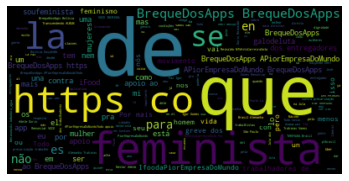

In [20]:
  #junta todos tuites numa string
  tuites = ''
  for index, row in df.iterrows():
    tuites = tuites + row['tweet']
    
  #monta a nuvem de palavras
  wordcloud = WordCloud().generate(tuites)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")